# Problema Chips resuelto con Regresión Logística

Utilizando las siguientes funciones/paquetes resolver los siguientes problemas de clasificación en problema_2.py:

genfromtxt de numpy para leer los dos datasets:

./datasets/student_admission.txt
./datasets/chip_tests.txt
train_test_split de sklearn para dividir entre test set y train set. Recomendamos un 40% de datos para test set

Y la función plot_boundaries(X_train, X_test, y_train, y_test, score, predict_proba, ax=ax, h=h) incluida en problema_2.py para graficar los resultados. X_train es un np.array con los features de entrada, y_train es la etiqueta. Lo mismo con X_test e y_test, Score es el 'accuracy' del modelo, predict_proba es la función que dada una entrada de la probabilidad de clasificar correcto y h es el paso para la grafica del 'boundary'

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd

def plot_boundaries(X_train, y_train, score, probability_func, degree = None, n_colors = 100, mesh_res = 1000, ax = None):
   
    X = X_train #np.vstack((X_test, X_train))
    margin_x = (X[:, 0].max() - X[:, 0].min())*0.05
    margin_y = (X[:, 1].max() - X[:, 1].min())*0.05
    x_min, x_max = X[:, 0].min() - margin_x, X[:, 0].max() + margin_x
    y_min, y_max = X[:, 1].min() - margin_y, X[:, 1].max() + margin_y
    hx = (x_max-x_min)/mesh_res
    hy = (y_max-y_min)/mesh_res
    x_domain = np.arange(x_min, x_max, hx)
    y_domain = np.arange(y_min, y_max, hy)
    xx, yy = np.meshgrid(x_domain, y_domain)

    if ax is None:
        ax = plt.subplot(1, 1, 1)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if degree is not None:
        #polynomial_set = get_polynimial_set(np.c_[xx.ravel(), yy.ravel()], degree = degree)
        #Z = probability_func(polynomial_set)[:, 1]
        poly = PolynomialFeatures(degree, include_bias=False)
        polynomial_set = poly.fit_transform(np.c_[xx.ravel(), yy.ravel()])
        Z = probability_func(polynomial_set)[:, 1]
    else:
        Z_aux = probability_func(np.c_[xx.ravel(), yy.ravel()])
        Z = Z_aux[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    cf = ax.contourf(xx, yy, Z, n_colors, vmin=0., vmax=1., cmap=cm, alpha=.8)
    plt.colorbar(cf, ax=ax)
    #plt.colorbar(Z,ax=ax)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', s=100, marker='o')
    
    boundary_line = np.where(np.abs(Z-0.5)<0.001)
    
    ax.scatter(x_domain[boundary_line[1]], y_domain[boundary_line[0]], color='k', alpha=0.5, s=1)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #ax.set_xticks(())
    #ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=40, horizontalalignment='right')
    
import math
def nCr(n,r):
    f = math.factorial
    return int(f(n) / f(r) / f(n-r))

'''
def get_polynimial_set(X, degree = 12):
    # Recibe el dataset X de numero_de_muestras x features  y devuelve una matriz con todas las combinaciones 
    # De los productos del grado indicado en degree
    k = 2
    n = degree + k
    pos = 0
    X_mat = np.zeros((X.shape[0],nCr(n,k)))
    for i in range(degree + 1):
        for j in range(i+1):
            X_mat[:,pos] = (X[:,0]**(i-j))*X[:,1]**j
            pos = pos + 1
    return X_mat
'''

'\ndef get_polynimial_set(X, degree = 12):\n    # Recibe el dataset X de numero_de_muestras x features  y devuelve una matriz con todas las combinaciones \n    # De los productos del grado indicado en degree\n    k = 2\n    n = degree + k\n    pos = 0\n    X_mat = np.zeros((X.shape[0],nCr(n,k)))\n    for i in range(degree + 1):\n        for j in range(i+1):\n            X_mat[:,pos] = (X[:,0]**(i-j))*X[:,1]**j\n            pos = pos + 1\n    return X_mat\n'

Orden:  1
Shape:  (70, 2)
El score del set de training es: 0.5714285714285714
El score del set de testing es: 0.4166666666666667


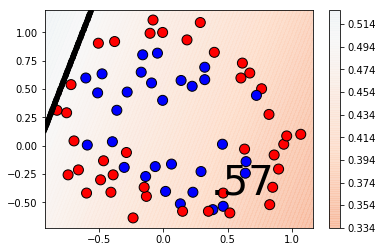

Orden:  2
Shape:  (70, 5)
El score del set de training es: 0.8714285714285714
El score del set de testing es: 0.75


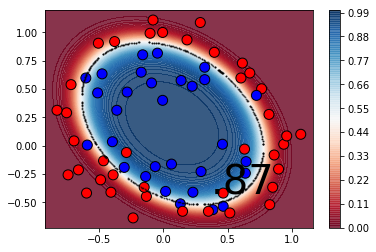

Orden:  3
Shape:  (70, 9)
El score del set de training es: 0.8857142857142857
El score del set de testing es: 0.7291666666666666


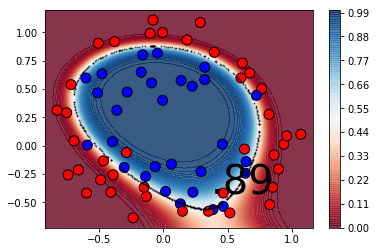

Orden:  4
Shape:  (70, 14)
El score del set de training es: 0.9428571428571428
El score del set de testing es: 0.75


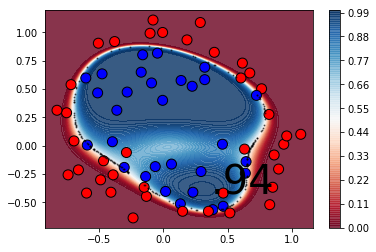

Orden:  5
Shape:  (70, 20)
El score del set de training es: 0.9285714285714286
El score del set de testing es: 0.6458333333333334


/home/luisina/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


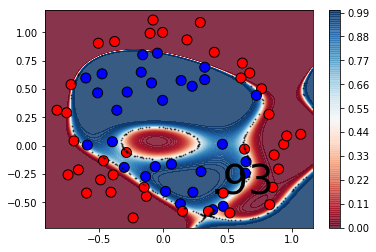

Orden:  6
Shape:  (70, 27)
El score del set de training es: 0.9714285714285714
El score del set de testing es: 0.6666666666666666


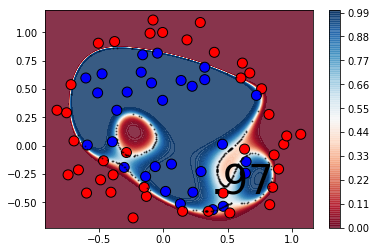

Orden:  7
Shape:  (70, 35)
El score del set de training es: 0.9857142857142858
El score del set de testing es: 0.6875


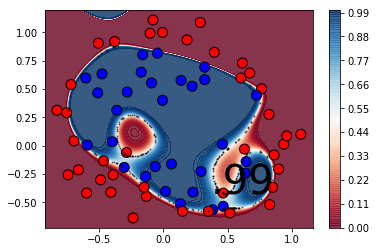

Orden:  8
Shape:  (70, 44)
El score del set de training es: 1.0
El score del set de testing es: 0.7291666666666666


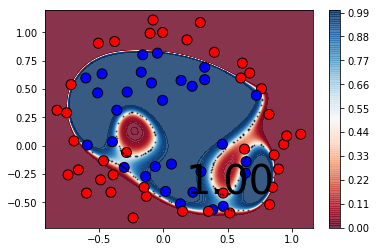

Orden:  9
Shape:  (70, 54)
El score del set de training es: 0.9857142857142858
El score del set de testing es: 0.7291666666666666


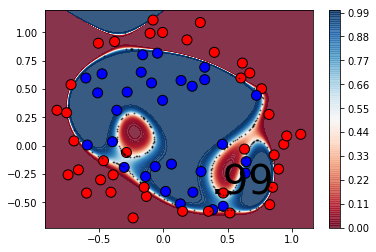

Orden:  10
Shape:  (70, 65)
El score del set de training es: 1.0
El score del set de testing es: 0.7083333333333334


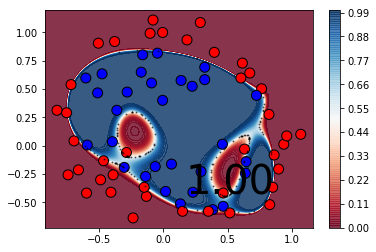

Orden:  11
Shape:  (70, 77)
El score del set de training es: 0.9857142857142858
El score del set de testing es: 0.7083333333333334


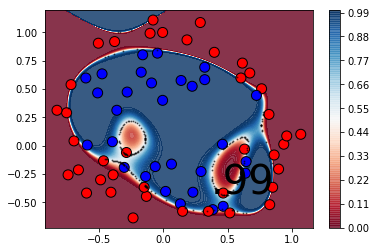

Orden:  12
Shape:  (70, 90)
El score del set de training es: 1.0
El score del set de testing es: 0.7083333333333334


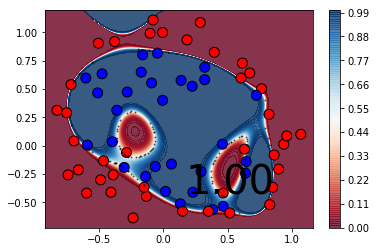

Orden:  13
Shape:  (70, 104)
El score del set de training es: 0.9714285714285714
El score del set de testing es: 0.75


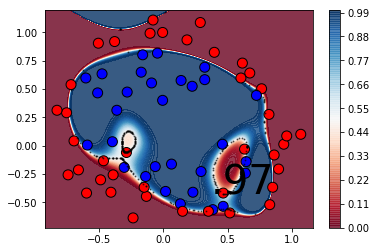

Orden:  14
Shape:  (70, 119)
El score del set de training es: 0.9857142857142858
El score del set de testing es: 0.7083333333333334


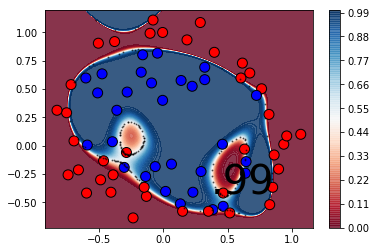

Orden:  15
Shape:  (70, 135)
El score del set de training es: 0.9857142857142858
El score del set de testing es: 0.6875


In [ ]:

data_path="./chip_tests.txt"

#Obtengo los datos
dictionary= np.genfromtxt(data_path, delimiter=",")
features=dictionary[:,(0,1)]
labels=dictionary[:,2]

#Separo los datos: training-test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=2)

results = pd.DataFrame(columns=['Degrees','Training_Scores','Testing_Scores'])

print('=================================================')
for K in range(1,16):
    print('Orden: ', K)
    
    #Genero mas features
    poly = PolynomialFeatures(K, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    print('Shape: ', X_train_poly.shape)
    X_test_poly = poly.fit_transform(X_test)
    
    #Entreno el modelo
    clf=linear_model.LogisticRegression(C=1000000)
    clf.fit(X_train_poly, y_train)
    
    #Calculo y guardo scores
    train_score = clf.score(X_train_poly, y_train)
    test_score = clf.score(X_test_poly, y_test)  
    print("El score del set de training es:", train_score)
    print("El score del set de testing es:", test_score)
    results = results.append({'Degrees':K, 'Training_Scores':train_score, 'Testing_Scores':test_score}, ignore_index=True)
    
    #Grafico
    plot_boundaries(X_train_poly, y_train, train_score, probability_func=clf.predict_proba, degree=K)
    plt.show()
    print('=================================================')

%matplotlib inline
plt.plot('Degrees', 'Training_Scores', data=results, color='Red', label='Score de entrenamiento')
plt.plot('Degrees', 'Testing_Scores', data=results, color='Blue', label='Score de prueba')
plt.title('Regresión Logística - Scores según grado')
plt.legend(loc="best")
plt.show()
